

>#     **PRACTICA FINAL DE LA ASIGNATURA *DEEP LEARNING***
                                     Profesor  Félix Fuentes Hurtado
                                       Alumno  Francisco Javier Gonzálvez Chico
                                       Título  Modelo Predictivo de Precios de Alquiler de Inmuebles AirBNB en Madrid



In [0]:
# montamos la unidad de drive para poder acceder a sus archivos

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# imports necesarios

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
# cargamos el csv de airbnb reducido (14.780 filas)

airbnb_14780 = pd.read_csv('/content/gdrive/My Drive/Deep Learning/Practica_Final/airbnb-listings.csv', sep = ';', decimal = '.')

print(f"Tenemos un dataset con {airbnb_14780.shape[0]} filas y {airbnb_14780.shape[1]} columnas\n")

airbnb_14780.columns

Tenemos un dataset con 14780 filas y 89 columnas



Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

# Para el primer modelo que probaremos se utilizará la selección del dataset que se obtuvo tras un detallado análisis del mismo en la práctica de Machine Learning.

###Para ello iremos ejecutando a continuación (de forma bastante sintetizada) el análisis y la selección de columnas que se realizó sobre el dataset para la práctica de Machine Learning.

----------------------------------------------
----------------------------------------------

Presentamos una visión inicial de las columnas del dataset y la primera decisión que tomamos sobre ellas en función de si entendimos que aportarían capacidad predictora o utilidad al modelo.

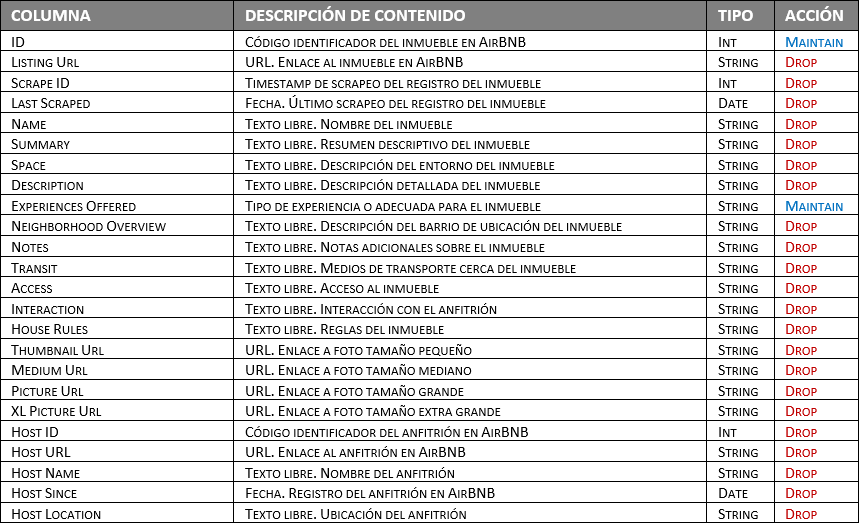
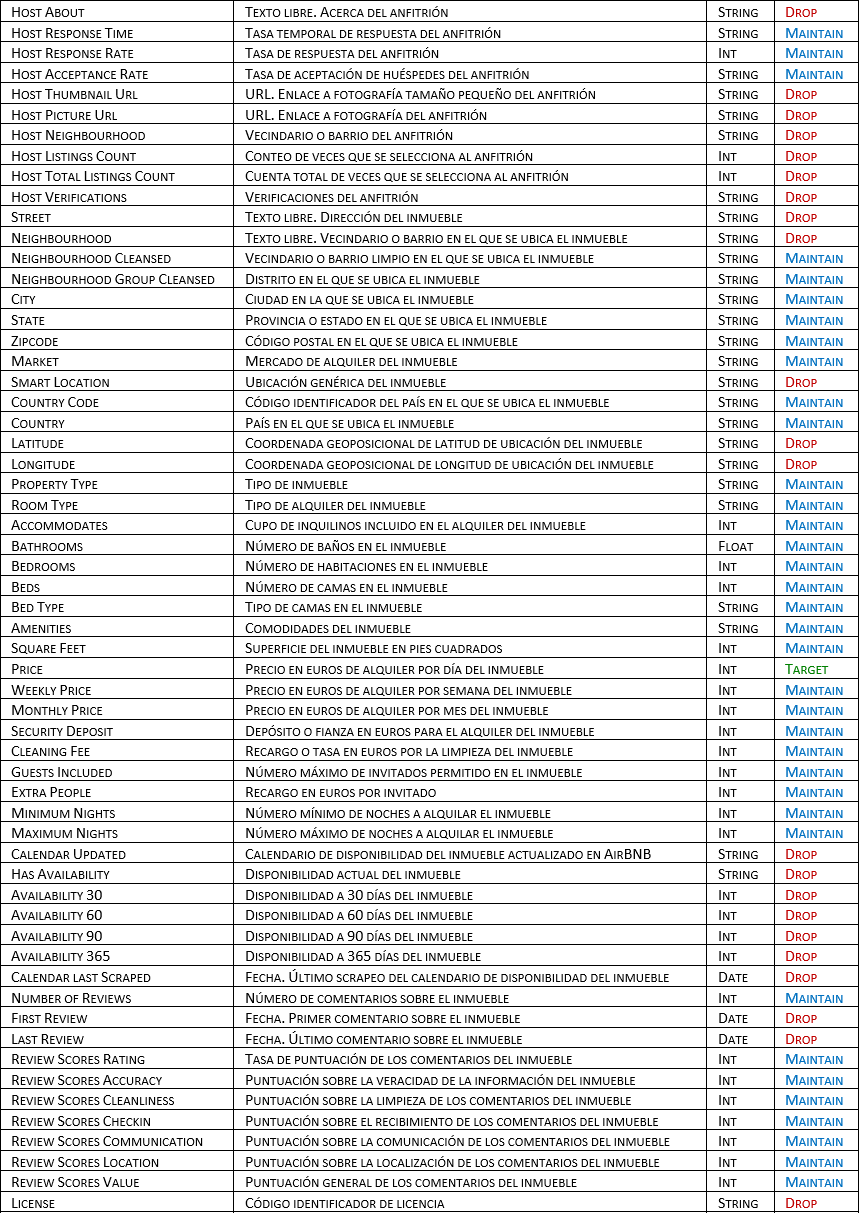
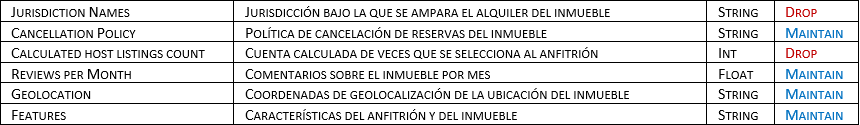

In [0]:
# tras la primera impresión, eliminamos las columnas marcadas con 'DROP' en la tabla superior
#  (LA COLUMNA 'ID' NO APORTARÁ VALOR PREDICTIVO, PERO LA RESERVAMOS COMO CLAVE DE CRUCE PARA DESPUÉS PODER UNIR OTRAS COLUMNAS AL DATASET)
#  (LA COLUMNA ''THUMBNAIL URL' LA RESERVAMOS PARA PODER DESCARGAR LAS IMAGENES QUE UTILIZAREMOS EN LA RED NEURNONAL CONVOLUCIONAL)

airbnb_01 = airbnb_14780.drop(['Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Medium Url', 'Picture Url',
                               'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
                               'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood', 'Smart Location', 'Latitude', 'Longitude', 'Calendar Updated', 'Has Availability', 'Availability 30', 
                               'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'First Review', 'Last Review', 'License', 'Jurisdiction Names', 'Calculated host listings count'], axis = 1)

### Tras analizar las siguientes columnas vimos que, o estaban prácticamente desinformadas, o contaban con un único valor mayoritario... en consecuencia decidimos eliminarlas por que no aportarían valor predictivo al modelo.

*   Experiences Offered
*   Host Acceptance Rate
*   State
*   Zipcode
*   Market
*   Country Code
*   Country
*   Square Feet

In [0]:
# tras el análisis anterior eliminamos las columnas referenciadas en la lista

airbnb_01.drop(['Experiences Offered', 'Host Acceptance Rate', 'State', 'Zipcode', 'Market', 'Country Code', 'Country', 'Square Feet'], axis = 1, inplace = True)

### El resto de las columnas se limpiaron, se acomodaron, incluso se obtuvieron variables nuevas a partir de algunas de ellas (más adelante se replicarán todos estos pasos para las columnas que al final fueron seleccionadas).

Una vez las columnas estaban listas para ser procesadas se realizó un análisis de correlación.

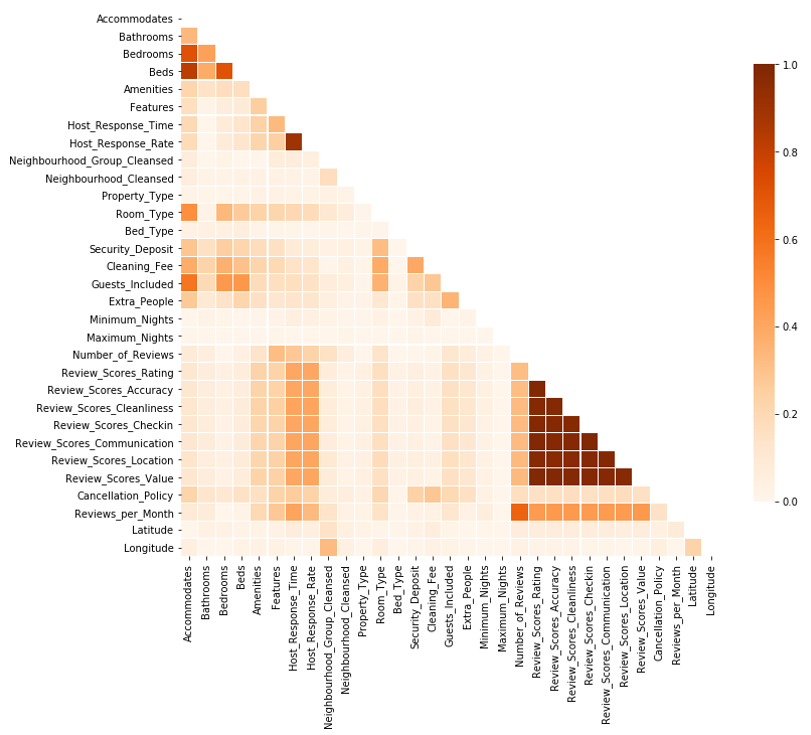

Tras el que se decidió eliminar las siguientes:

*   Review Scores Accuracy
*   Review Scores Cleanliness
*   Review Scores Checkin
*   Review Scores Communication
*   Review Scores Location
*   Review Scores Rating  -- todas las anteriores estaban altamente correlacionadas con 'Review Scores Value' --
*   Host Response Time  -- por estar altamente correlacionada con 'Host Response rate' --
*   Beds  -- por estar altamente correlacionada con 'Accommodates' --

In [0]:
# tras el análisis de correlaciones eliminamos las columnas referenciadas en la lista anterior

airbnb_01.drop(['Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Rating', 'Host Response Time', 'Beds'], axis = 1, inplace = True)


## Las columnas restantes se procesaron con varios modelos especializados en la selección de variables y en la reducción de la dimensionalidad.
Se ejecutaron 6 modelos diferentes con los que se midió la importancia de todas las columnas:

*   F-Regression
*   Mutual Info
*   Lasso
*   DecissionTreeRegressor
*   RandomForestRegressor
*   GradientBoostingRegressor

Y se concluyó que se eliminarían las siguientes por tener un muy bajo aporte predictivo:

*   Bed Type
*   Maximum Nights
*   Property Type
*   Number of Reviews
*   Review Scores Value
*   Neighbourhood Cleansed
*   Minimum Nights
*   Cancellation Policy
*   Security Deposit
*   Reviews per Month
*   Features
*   Host Response Rate
*   Extra People
*   Longitude  (esta variable se obtuvo a partir de 'Geolocation')

In [0]:
# tras el análisis de importancia de las variables eliminamos las columnas referenciadas en la lista anterior (excepto 'Longitude' ya que aun no la hemos generado)

airbnb_01.drop(['Bed Type', 'Maximum Nights', 'Property Type', 'Number of Reviews', 'Review Scores Value', 'Neighbourhood Cleansed', 'Minimum Nights', 'Cancellation Policy', 'Security Deposit',
                'Reviews per Month', 'Features', 'Host Response Rate', 'Extra People'], axis = 1, inplace = True)

## Para adecuar la columna 'Neighbourhood Group Cleansed'.
*   Se eliminaron los registros en los que su valor era nulo
*   Se eliminaron los registros en los que el valor de 'City' no era ***Madrid*** (y despúes se eliminó dicha columna 'City')
*   Se categorizó utilizando el método ***LabelEncoder*** de la librería ***preprocessing*** de ***sklearn (scikit-learn)*** y dejando esta tarea al libre albedrío (inocente) de dicho método, ya que no era nuestro deseo otorgar conscientemente más peso a unos ditritos frente a otros

In [0]:
from sklearn.preprocessing import LabelEncoder

airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['City'] != 'Madrid')].index)
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Neighbourhood Group Cleansed'].isnull())].index)

le = LabelEncoder()
airbnb_01['Neighbourhood Group Cleansed'] = le.fit_transform(airbnb_01['Neighbourhood Group Cleansed'])
airbnb_01.drop(['City'], axis = 1, inplace = True)

## Para adecuar la columna 'Room Type'.
*   Se comprobó que no existían registros en los que el valor de esta columna fuera nulo
*   Se categorizó utilizando un diccionario de pesos que otorgaba mayor valor a los tipos de alquiler con más privacidad para el cliente

In [0]:
rt_dict = {'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2}

airbnb_01['Room Type'] = airbnb_01['Room Type'].map(rt_dict)

## Para adecuar la columna 'Bathrooms'.
*   Como era numérica no era necesario utilizar ningún método para su categorización
*   Se comprobó que existían registros en los que contenía valor nulo. Para sanearlos se decidió asimilarlos en función de los valores de la columna 'Room Type': Se asignaría el valor ***0.0*** a los registros con 'Room Type' ***0*** o ***1*** (***Shared room*** o ***Private room***) y el valor ***1.0*** a los registros con 'Room Type' ***2*** (***Entire home/apt***)

In [0]:
airbnb_01['Bathrooms'] = np.where((airbnb_01['Bathrooms'].isnull()) & ((airbnb_01['Room Type'] == 0) | (airbnb_01['Room Type'] == 1)), 0.0, airbnb_01['Bathrooms'])
airbnb_01['Bathrooms'] = np.where((airbnb_01['Bathrooms'].isnull()) & (airbnb_01['Room Type'] == 2), 1.0, airbnb_01['Bathrooms'])

## Para adecuar la columna 'Bedrooms'.
*   Como era numérica no era necesario utilizar ningún método para su categorización
*   Se comprobó que existían registros en los que contenía valor nulo y también valor 0.0. Para sanearlos se decidió asimilarlos al valor ***1.0*** entendiendo que cualquier tipo de inmueble tendría al menos un cuarto o un espacio –aunque no fuera un dormitorio propiamente dicho– en el que dispondría de algún tipo de cama

In [0]:
airbnb_01['Bedrooms'] = np.where((airbnb_01['Bedrooms'].isnull()) | (airbnb_01['Bedrooms'] == 0.0), 1.0, airbnb_01['Bedrooms'])

## La columna 'Amenities' era un listado de las comodidades, lujos o extras con los que contaba cada inmueble.
Se decidió transformarla en una suma de dichas comodidades y de esta forma la categorizaríamos otorgándole un peso directamente proporcional al de las comodidades del inmueble... y en consecuencia se asimilarían sus valores nulos al valor ***0***.

Bien es cierto que siempre se va a valorar más un inmueble con ascensor o con internet wifi frente a otro que simplemente provea champú o una televisión y que evidentemente se podría haber realizado un estudio de pesos más detallado, ajustado o acorde a la importancia de cada lujo, pero enfrentando el posible escesivo coste de este análisis, contra el posible valor predictor futuro que aportaría, se optó por una simple adición de dichos lujos.

In [0]:
airbnb_01['Amenities'] = np.where((airbnb_01['Amenities'].isnull()), '0', airbnb_01['Amenities'])

airbnb_01['Amenities'] = np.where((airbnb_01['Amenities'] == '0'), 0, airbnb_01['Amenities'].apply(lambda x: len(x.split(","))))

## Para adecuar la columna 'Cleaning Fee'.
*   Como era numérica no era necesario utilizar ningún método para su categorización
*   Se comprobó que existían registros en los que contenía valor nulo. Para sanearlos se decidió asimilarlos al valor ***0.0*** entendiendo que si el propietario del inmueble no había especificado una cuota por la limpieza del mismo sería porque no se cobraría

In [0]:
airbnb_01['Cleaning Fee'] = np.where((airbnb_01['Cleaning Fee'].isnull()), 0.0, airbnb_01['Cleaning Fee'])

## La columna 'Geolocation' contenía las coordenadas de geolocalización de los inmuebles en un formato mejor que el de las columnas individuales 'Latitude' y 'Longitude' originales, que se eliminaron al principio.

*   Se comprobó que no existían registros en los que contuviera valor nulo
*   Como la columna, en sí misma, contenía valores únicos (las localizaciones exactas de cada inmueble) no aportaba valor predictivo al modelo, pero se decidió dividirla en unas nuevas columnas 'Latitude' y 'Longitude' ya numéricas, que por separado probablemente podrían tener algún sentido predictivo
*   Como vimos, tras el estudio de reducción de la dimensionalidad, se decidió eliminar la columna 'Longitude' (por tanto ahora no la generaremos)... en cambio, 'Latitude' llegó a incluirse en el modelo final

In [0]:
airbnb_01['Geolocation'] = airbnb_01['Geolocation'].apply(lambda x: x.split(","))

airbnb_01['Latitude'] = pd.to_numeric(airbnb_01['Geolocation'].apply(lambda x: x[0]))

airbnb_01.drop(['Geolocation'], axis = 1, inplace = True)

## Las columnas 'Accommodates' y 'Guests Included' eran numéricas y se comprobó que no existían registros en los que contuvieran valores nulos, por tanto no necesitaron ningún proceso de categorización ni de limpieza.

## Nuestra columna objetivo (o etiqueta) 'Price' era numérica por lo que no necesitaba categorización.

*   Se comprobó que no contuviera valores erróneos
*   Se comprobó que existían registros en los que contenía valor nulo. Y para intentar rescatarlos se utilizaron las columnas 'Weekly Price' y 'Monthly Price'. Si el inmueble no tenía valor en 'Price', pero sí un precio semanal, dividiríamos éste entre 7 para obtenerlo. Si el inmueble no tenía valor en 'Price', pero sí un precio mensual, dividiríamos éste entre 30 para obtenerlo
*   El resto de registros, imposibles de rescatar, se eliminarían
*   Las columnas 'Weekly Price' y 'Monthly Price' se eliminarían finalmente por no aportar más valor al modelo

In [0]:
airbnb_01['Price'] = np.where((airbnb_01['Price'].isnull() & (~airbnb_01['Weekly Price'].isnull())), np.around(airbnb_01['Weekly Price'] / 7, 0), airbnb_01['Price'])
airbnb_01['Price'] = np.where((airbnb_01['Price'].isnull() & (~airbnb_01['Monthly Price'].isnull())), np.around(airbnb_01['Monthly Price'] / 30, 0), airbnb_01['Price'])

airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Price'].isnull())].index)

airbnb_01.drop(['Weekly Price', 'Monthly Price'], axis = 1, inplace = True)

## Adicionalmente, se visualizaron los histogramas de las columnas seleccionadas y se tomó la decisión de transformar de forma logarítmica la variable 'Price' ya que presentaba una distribución chi-cuadrado (muy agrupada a la izquierda).
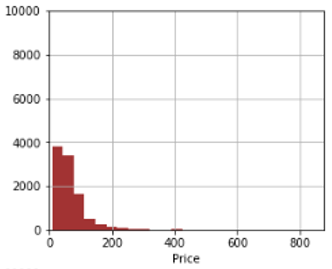

In [0]:
airbnb_01['Price'] = np.log10(airbnb_01['Price'])

## Una vez realizada la transformación el histograma aparecía más centrado, en mejor disposición para su análisis por los modelos.

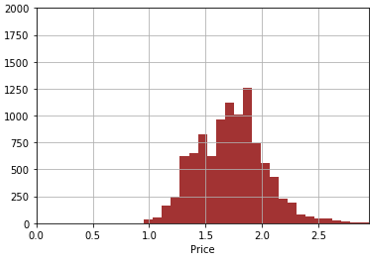

## Analizadas todas las columnas y realizada su selección final, pasamos al análisis de outliers, tras el que se decidió desechar los registros del dataset que no cumplieran los siguientes requisitos:
*   Accommodates ≤ 12
*   Bathrooms ≤ 4
*   Bedrooms ≤ 6
*   0 < Amenities ≤ 35
*   40.30 < Latitude < 40.50
*   Cleaning Fee ≤ 150
*   Guests Included ≤ 7
*   Price ≤ 2.845   (~ 700€)


In [0]:
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Accommodates'] > 12)].index)
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Bathrooms'] > 4)].index)
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Bedrooms'] > 6)].index)
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Latitude'] < 40.30) | (airbnb_01['Latitude'] > 40.50)].index)
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Cleaning Fee'] > 150)].index)
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Guests Included'] > 7)].index)
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Price'] > 2.485)].index)

# Tras todo el proceso de análisis anterior (que he ido reseñando de forma bastante escueta pero que, si se considera necesario, se puede consultar en el documento entregado para la práctica de Machine Learning, colgado [aquí](https://github.com/franjagon/Entregas_Finales_BD_ML/blob/master/Practica_Final_Machine_Learning.docx)), el dataset quedó con **10** columnas y **12.905** filas útiles.
# Ahora contamos con 12 por haber mantenido las columnas 'ID' y 'Thumbnail Url'...  las recolocamos para ubicar nuestra columna target la primera.

### El motivo de intentar y conseguir descartar tantas columnas era obtener un modelo que resultara implementable, con un coste de ejecución asumible y que generalizara lo mejor posible. Con un número menor de variables siempre es más facil aplicar regularizaciones de pesos sobre un modelo.

In [0]:
airbnb_01 = airbnb_01[['Price', 'ID', 'Thumbnail Url', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Amenities', 'Cleaning Fee', 'Guests Included', 'Neighbourhood Group Cleansed', 'Latitude']]

print(f"El dataset tiene ahora {airbnb_01.shape[0]} filas y {airbnb_01.shape[1]} columnas")

airbnb_01.isnull().any()

El dataset tiene ahora 12905 filas y 12 columnas


Price                           False
ID                              False
Thumbnail Url                    True
Room Type                       False
Accommodates                    False
Bathrooms                       False
Bedrooms                        False
Amenities                       False
Cleaning Fee                    False
Guests Included                 False
Neighbourhood Group Cleansed    False
Latitude                        False
dtype: bool

# Como observamos, la columna 'Thumbnail Url' (que aun no ha sido saneada) contiene nulos... procedemos a eliminarlos del dataset.
Tras hacerlo el conjunto de datos se queda en **10.507** registros. 

In [0]:
airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['Thumbnail Url'].isnull())].index)

print(f"El dataset tiene ahora {airbnb_01.shape[0]} filas y {airbnb_01.shape[1]} columnas")

airbnb_01.isnull().any()

El dataset tiene ahora 10507 filas y 12 columnas


Price                           False
ID                              False
Thumbnail Url                   False
Room Type                       False
Accommodates                    False
Bathrooms                       False
Bedrooms                        False
Amenities                       False
Cleaning Fee                    False
Guests Included                 False
Neighbourhood Group Cleansed    False
Latitude                        False
dtype: bool

-------------------------------------------------

# <PRE> ALMACENAMOS LAS FOTOS DE LOS INMUEBLES EN LA CARPETA '***imagenes***'

--------------------------------------------------

In [0]:
# ¡¡¡ ATENCION !!!
#                     ESTA CELDA SOLO SE DEBE EJECUTAR UNA VEZ LA CARPETA ESTA YA CREADA EN MI DIVE
# ¡¡¡ ATENCION !!!

# creamos un directorio para poder contener las imágenes que descarguemos de los inmuebles

!mkdir gdrive/My\ Drive/Deep\ Learning/Practica_Final/imagenes
!ls -l gdrive/My\ Drive/Deep\ Learning/Practica_Final

In [0]:
# ¡¡¡ ATENCION !!!
#                     ESTA CELDA SOLO SE DEBE EJECUTAR UNA VEZ
# ¡¡¡ ATENCION !!!

!pip install requests

In [0]:
# ¡¡¡ ATENCION !!!
#                     ESTA CELDA SOLO SE DEBE EJECUTAR UNA VEZ LAS 10.507 IMAGENES YA ESTAN DESCARGADAS
# ¡¡¡ ATENCION !!!

import requests

# descargamos a la carpeta 'imagenes' las fotos de los inmuebles del dataset

for index, row in airbnb_01.iterrows():
  url_img = row['Thumbnail Url']
  img_name = 'gdrive/My Drive/Deep Learning/Practica_Final/imagenes/{}.jpg'.format(row['ID']) 
  imagen = requests.get(url_img).content
  with open(img_name, 'wb') as handler:
    handler.write(imagen)

# Una vez descargadas las imágenes observamos que 18 de ellas están corruptas. No tienen dimensiones ni tamaño.
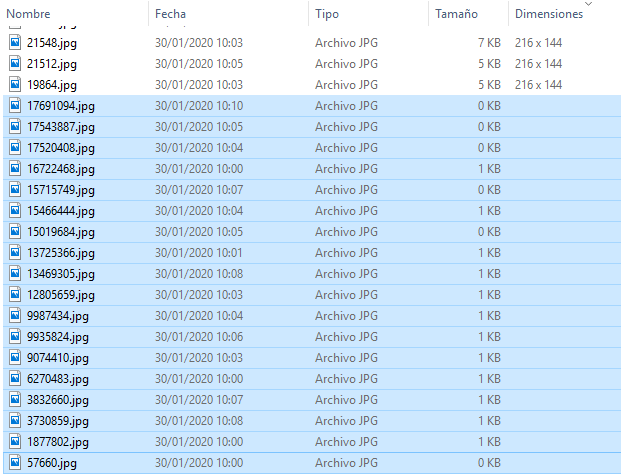
# Procedemos a eliminar sus registros del dataset.

In [0]:
IDs_corrupt = [9074410, 12805659, 17520408, 9987434, 15466444, 17543887,
               15019684, 9935824, 3832660, 15715749, 3730859, 13469305,
               17691094, 6270483, 1877802, 16722468, 57660, 13725366]

for IDc in IDs_corrupt:
  airbnb_01 = airbnb_01.drop(airbnb_01[(airbnb_01['ID'] == IDc)].index)

# Confirmamos que el dataset ha perdido 18 registros (los correspondientes a imágenes corruptas).

In [0]:
print(f"El dataset tiene ahora {airbnb_01.shape[0]} filas y {airbnb_01.shape[1]} columnas")

El dataset tiene ahora 10489 filas y 12 columnas


# Las imagenes tienen un formato de 144x216 y esto no nos parece adecuado.
## <PRE> Las reduciremos a 32x32 y cambiaremos de formato a png.

In [0]:
# ¡¡¡ ATENCION !!!
#                     ESTA CELDA SOLO SE DEBE EJECUTAR UNA VEZ LA CARPETA ESTA YA CREADA EN MI DRIVE
# ¡¡¡ ATENCION !!!

# creamos un directorio para poder contener las imágenes reducidas en formato png

!mkdir gdrive/My\ Drive/Deep\ Learning/Practica_Final/imgs_png

In [0]:
# ¡¡¡ ATENCION !!!
#                     ESTA CELDA SOLO SE DEBE EJECUTAR UNA VEZ LAS IMAGENES YA ESTAN CONVERTIDAS
# ¡¡¡ ATENCION !!!

from PIL import Image

# Reformatemaos las imagenes y las almacenamos en la carpeta 'imgs_png'

for index, row in airbnb_01.iterrows():
  img_name = 'gdrive/My Drive/Deep Learning/Practica_Final/imagenes/{}.jpg'.format(row['ID'])
  img_name2 = 'gdrive/My Drive/Deep Learning/Practica_Final/imgs_png/{}.png'.format(row['ID'])

  img = Image.open(img_name)
  new_img = img.resize((32, 32))
  new_img.save(img_name2,'png')

# Una vez tenemos el dataset preparado, lo siguiente es particionarlo en tres conjuntos de datos: primero en Train y Test (y después de Train obtendremos una subpartición para Validación).


In [0]:
from sklearn.model_selection import train_test_split

trainT, test = train_test_split(airbnb_01, test_size = 0.2, shuffle = True, random_state = 0)
train, validate = train_test_split(trainT, test_size = 0.1, shuffle = True, random_state = 0)

print(f'El conjunto Train    ha quedado con {train.shape[0]} filas y {train.shape[1]} columnas')
print(f'El conjunto Validate ha quedado con  {validate.shape[0]} filas y {validate.shape[1]} columnas')
print(f'El conjunto Test     ha quedado con {test.shape[0]} filas y {test.shape[1]} columnas')

El conjunto Train    ha quedado con 7551 filas y 12 columnas
El conjunto Validate ha quedado con  840 filas y 12 columnas
El conjunto Test     ha quedado con 2098 filas y 12 columnas


# Queremos, por un lado, probar el mismo conjunto de datos que utilizamos en la práctica de Machine Learning con un modelo regresivo de Deep Learning y, por otro lado, procesar en una red neuronal convolucional las imágenes de los inmuebles.
## Finalmente intentaremos que ambas redes realicen el ejercicio de predicción juntas.

### Generaremos dos tripletas de particiones a partir de las que ahora tenemos:
*   La primera contará con las 10 columnas que utilizamos en la práctica de Machine Learning
*   La segunda sólo contendrá las columnas: 'Price', 'ID' y 'Thumbnail Url'... y la utilizaremos en una red neuronal convolucional para tratar las imágenes 

In [0]:
train_01 = train.drop(['ID', 'Thumbnail Url'], axis = 1)
train_02 = train[['Price', 'ID', 'Thumbnail Url']]

validate_01 = validate.drop(['ID', 'Thumbnail Url'], axis = 1)
validate_02 = validate[['Price', 'ID', 'Thumbnail Url']]

test_01 = test.drop(['ID', 'Thumbnail Url'], axis = 1)
test_02 = test[['Price', 'ID', 'Thumbnail Url']]

print(f"La primera tripleta tiene {train_01.shape[1]} columnas y cuenta con:\n  * {train_01.shape[0]} filas en el conjunto de Train\n  * {validate_01.shape[0]}  filas en el conjunto de Validate\n  * {test_01.shape[0]} filas en el conjunto de Test")
print(f"\nLa segunda tripleta tiene {train_02.shape[1]} columnas y cuenta con:\n  * {train_02.shape[0]} filas en el conjunto de Train\n  * {validate_02.shape[0]}  filas en el conjunto de Validate\n  * {test_02.shape[0]} filas en el conjunto de Test")

La primera tripleta tiene 10 columnas y cuenta con:
  * 7551 filas en el conjunto de Train
  * 840  filas en el conjunto de Validate
  * 2098 filas en el conjunto de Test

La segunda tripleta tiene 3 columnas y cuenta con:
  * 7551 filas en el conjunto de Train
  * 840  filas en el conjunto de Validate
  * 2098 filas en el conjunto de Test


# Ahora, utilizando la primera tripleta, separaremos nuestra variable objetivo y normalizaremos los datos de sus tres particiones

In [0]:
values_trn_01 = train_01.values
values_vld_01 = validate_01.values
values_tst_01 = test_01.values

columns_names_01 = train_01.columns[1:]

X_trn_01 = values_trn_01[:, 1:]
y_trn_01 = values_trn_01[:, 0:1]

X_vld_01 = values_vld_01[:, 1:]
y_vld_01 = values_vld_01[:, 0:1]

X_tst_01 = values_tst_01[:, 1:]
y_tst_01 = values_tst_01[:, 0:1]

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_trn_01)

X_trn_01_norm = scaler.transform(X_trn_01)
X_vld_01_norm = scaler.transform(X_vld_01)
X_tst_01_norm = scaler.transform(X_tst_01)

# Podriamos haber normalizado con otro scaler de la librería preprocessing, o también haberlo hecho mediante la media y la desviación típica del conjunto de train

# scaler2 = preprocessing.MinMaxScaler(feature_range = (0, 1))
# scaler2 = scaler.fit(X_trn_01)

# X_trn_01_norm2 = scaler2.transform(X_trn_01)
# X_vld_01_norm2 = scaler2.transform(X_vld_01)
# X_tst_01_norm2 = scaler2.transform(X_tst_01)

# X_trn_01_mean = np.mean(X_trn_01, axis = 0)
# X_trn_01_std = np.std(X_trn_01, axis = 0)

# X_trn_01_norm3 = (X_trn_01 - X_trn_01_mean) / X_trn_01_std
# X_vld_01_norm3 = (X_vld_01 - X_trn_01_mean) / X_trn_01_std
# X_tst_01_norm3 = (X_tst_01 - X_trn_01_mean) / X_trn_01_std

# Llego el momento de implementar un modelo básico de regresión.
*   Elegimos incluir 5 capas densas de 512, 128, 32, 8 y 1 neuronas con función de activación ***relu*** para las cuatro primeras.
*   Compilamos con el optimizador ***adam*** y su learning rate por defecto
*   Entrenamos 100 épocas, con un batch size de 128, comparando contra el conjunto de validación
*   Evaluamos contra el conjunto de test

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam

# Inicializamos el modelo
model_1 = Sequential()

# Añadimos nuestras capas regresoras
model_1.add(Dense(512, activation = 'relu', input_shape = [len(columns_names_01)]))
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dense(32, activation = 'relu'))
model_1.add(Dense(8, activation = 'relu'))
model_1.add(Dense(1))

# Compilamos el modelo
model_1.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Entrenamos el modelo
model_1.fit(X_trn_01_norm, y_trn_01, batch_size = 128, shuffle = True,
            epochs = 100, validation_data = (X_vld_01_norm, y_vld_01),
            verbose = 1)

# Evaluamos el modelo
scores_1 = model_1.evaluate(X_tst_01_norm, y_tst_01)

print('\nPérdidas (MSE) en el conjunto de Test: %.3f' % scores_1)

Using TensorFlow backend.





Train on 7551 samples, validate on 840 samples
Epoch 1/100





7551/7551 [==============================] - 2s 201us/step - loss: 0.3351 - val_loss: 0.0771
Epoch 2/100
7551/7551 [==============================] - 0s 35us/step - loss: 0.0583 - val_loss: 0.0521
Epoch 3/100
7551/7551 [==============================] - 0s 34us/step - loss: 0.0395 - val_loss: 0.0392
Epoch 4/100
7551/7551 [==============================] - 0s 36us/step - loss: 0.0308 - val_loss: 0.0336
Epoch 5/100
7551/7551 [==============================] - 0s 35us/step - loss: 0.0271 - val_loss: 0.0289
Epoch 6/100
7551/7551 [==============================] - 0s 34us/step - loss: 0.0258 - val_loss: 0.0269
Epoch 7/100
7551/7551 [==============================] - 0s 34us/step - loss: 0.0247 - val_loss: 0.0266
Epoch 8/100
7551/7551 [==============================] - 0s 34us/step - loss: 0.0240 - val_loss: 0.0259
Epoch 9/100
7551/7551 [==============================] - 0s 32us/step - loss: 0.0231 - val_loss: 0.0257
Epoch 10

# Como podemos observar, a medida que el modelo entrena épocas la función de pérdidas **RMSE** va bajando paulatinamente, lo que significa que nuestra red va aprendiendo.
# Terminado el entrenamiento, el error cuadrático medio de nuestro primer modelo, evaluado sobre los datos del conjunto de test, parece bastante bueno... un valor de pérdidas bastante bajo.
Veamos su media de error prediciendo.

Para ello compararemos sus resultados con los valores reales de nuestra variable objetivo y obtendremos la media de su diferencia.

Recordemos que nuestra variable objetivo está transformada logarítmicamente, por tanto tendremos que invertir esa transformación para ver el resultado en euros.  


In [0]:
y_predict_1 = model_1.predict(X_tst_01_norm)
error_prediccion_1 = np.absolute(y_predict_1 - y_tst_01)
med_ep_1 = np.mean(error_prediccion_1)

print("Media de error prediciendo del Modelo de Regresión: {:.4f} ~ {:.2f}€".format(med_ep_1, 10**med_ep_1))

Media de error prediciendo del Modelo de Regresión: 0.1170 ~ 1.31€


# El mejor modelo de nuestra práctica de Machine Learning fue un ***GradientBoostingRegressor*** que consiguió una media de error prediciendo de 1,97€. 

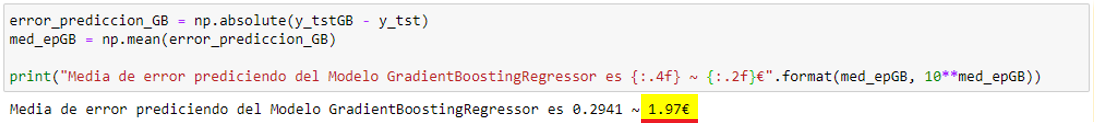

# Este modelo regresivo de Deep Learning lo mejora en algo mas del ***33%***.

# <PRE> IMPLEMENTAREMOS AHORA UNA RED NEURONAL CONVOLUCIONAL

# A partir de las fotos almacenadas en la carpeta '***imagenes/png***' vamos a proceder a obtener sus arrays numéricos.

In [0]:
# ya no necesitamos la columna 'Thumbnail Url'

train_02 = train_02.drop(['Thumbnail Url'], axis = 1)
validate_02 = validate_02.drop(['Thumbnail Url'], axis = 1)
test_02 = test_02.drop(['Thumbnail Url'], axis = 1)

In [0]:
# añadimos la columna Image a los tres conjuntos, conteniendo las rutas de las imagenes

train_02['Image'] = train_02['ID'].apply(lambda x: 'gdrive/My Drive/Deep Learning/Practica_Final/imgs_png/{}.png'.format(x))
validate_02['Image'] = validate_02['ID'].apply(lambda x: 'gdrive/My Drive/Deep Learning/Practica_Final/imgs_png/{}.png'.format(x))
test_02['Image'] = test_02['ID'].apply(lambda x: 'gdrive/My Drive/Deep Learning/Practica_Final/imgs_png/{}.png'.format(x))

In [0]:
import cv2

# función para generar los arrays de datos para la red convolucional

def carga_imagen(df):
  arr_imgs = df[~pd.isnull(df['Image'])]['Image'].values
  Ys = df.values[:, 0:1]

  n = len(arr_imgs)
  Xs = np.empty((n, 32, 32, 3), dtype = np.uint8)

  for i, ruta in enumerate(arr_imgs):
    image = cv2.imread(ruta, cv2.IMREAD_COLOR)
    Xs[i, ...] = image.transpose(0, 1, 2)
  
  return Xs, Ys

In [0]:
X_trn_02, y_trn_02 = carga_imagen(train_02)

In [0]:
X_vld_02, y_vld_02 = carga_imagen(validate_02)

In [0]:
X_tst_02, y_tst_02 = carga_imagen(test_02)

In [0]:
print(f'La forma de X en train es {X_trn_02.shape}, en validate es {X_vld_02.shape} y en test es {X_tst_02.shape}')

La forma de X en train es (7551, 32, 32, 3), en validate es (840, 32, 32, 3) y en test es (2098, 32, 32, 3)


# Vamos ahora a entrenar una red convolucional para procesar las imágenes 
*   Pero primero normalizamos los arrays de imagenes 

In [0]:
input_shape = (32, 32, 3)

# funcion para normalizar los arrays de imagenes

def norm_fotos(X):
  X_norm = []
  for i in X:
    X_norm.append(np.resize(i, input_shape) / 255)
  
  X_np_norm = np.array(X_norm)

  return X_np_norm

In [0]:
X_trn_02_norm = norm_fotos(X_trn_02)

In [0]:
X_vld_02_norm = norm_fotos(X_vld_02)

In [0]:
X_tst_02_norm = norm_fotos(X_tst_02)

In [0]:
print(f'La forma de X normalizada en train es {X_trn_02_norm.shape}, en validate es {X_vld_02_norm.shape} y en test es {X_tst_02_norm.shape}')

La forma de X normalizada en train es (7551, 32, 32, 3), en validate es (840, 32, 32, 3) y en test es (2098, 32, 32, 3)


# Construimos una red neuronal convolucional.
*   Elegimos incluir 3 capas convolucionales2D de 128 neuronas con función de activación ***relu***.
*   Añadimos una capa alisadora (Flatten), 1 capa densa de 8 neuronas con función de activación ***relu*** y finalmente una capa densa de una neurona. 
*   Compilamos con el optimizador ***adam*** y su learning rate por defecto
*   Entrenamos 50 épocas, con un batch size de 256, comparando contra el conjunto de validación
*   Evaluamos contra el conjunto de test

In [0]:
from keras.layers.core import Flatten
from keras.layers.convolutional import Conv2D

# Inicializamos el modelo
model_2 = Sequential()

# Añadimos una capa convolucional de 512 neuronas
model_2.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu',
                   input_shape = input_shape))

# Añadimos una segunda capa convolucional igual a la anterior
model_2.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))

# Añadimos una tercera capa convolucional igual a las anteriores
model_2.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))

# Añadimos capas regresoras
model_2.add(Flatten())
model_2.add(Dense(8, activation = 'relu'))
model_2.add(Dense(1))

# Compilamos el modelo
model_2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [0]:
# entrenamos 50 épocas con batch_size 256

model_2.fit(X_trn_02_norm, y_trn_02, epochs = 50, batch_size = 256,
            validation_data = (X_vld_02_norm, y_vld_02))

# Evaluamos el modelo
scores_2 = model_2.evaluate(X_tst_02_norm, y_tst_02)

print('\nPérdidas (MSE) en el conjunto de Test: %.3f' % scores_2)

Train on 7551 samples, validate on 840 samples
Epoch 1/50
7551/7551 [==============================] - 3s 420us/step - loss: 2.5074 - val_loss: 0.1438
Epoch 2/50
7551/7551 [==============================] - 1s 149us/step - loss: 0.1100 - val_loss: 0.0894
Epoch 3/50
7551/7551 [==============================] - 1s 150us/step - loss: 0.0788 - val_loss: 0.0769
Epoch 4/50
7551/7551 [==============================] - 1s 150us/step - loss: 0.0750 - val_loss: 0.0793
Epoch 5/50
7551/7551 [==============================] - 1s 150us/step - loss: 0.0715 - val_loss: 0.0739
Epoch 6/50
7551/7551 [==============================] - 1s 150us/step - loss: 0.0703 - val_loss: 0.0721
Epoch 7/50
7551/7551 [==============================] - 1s 150us/step - loss: 0.0689 - val_loss: 0.0704
Epoch 8/50
7551/7551 [==============================] - 1s 150us/step - loss: 0.0670 - val_loss: 0.0709
Epoch 9/50
7551/7551 [==============================] - 1s 150us/step - loss: 0.0678 - val_loss: 0.0782
Epoch 10/50
7551/

# Vemos que a medida que el modelo entrena épocas la función de pérdidas **RMSE** va bajando paulatinamente, lo que significa que nuestra red va aprendiendo. Y una vez termina, su error cuadrático medio, evaluado sobre los datos del conjunto de test, no nos parece malo.
## Veamos su media de error prediciendo.

Para ello compararemos sus resultados con los valores reales de nuestra variable objetivo y obtendremos la media de su diferencia.

Recordemos que nuestra variable objetivo está transformada logarítmicamente, por tanto tendremos que invertir esa transformación para ver el resultado en euros.

In [0]:
y_predict_2 = model_2.predict(X_tst_02_norm)
error_prediccion_2 = np.absolute(y_predict_2 - y_tst_02)
med_ep_2 = np.mean(error_prediccion_2)

print("Media de error prediciendo de la red neuronal convolucional: {:.4f} ~ {:.2f}€".format(med_ep_2, 10**med_ep_2))

Media de error prediciendo de la red neuronal convolucional: 0.2281 ~ 1.69€


# Incluso la red convolucional, analizando sólo imágenes, mejora los resultados del modelo ***GradientBoostingRegressor*** de Machine Learning.

# <PRE> UNIREMOS AMBOS MODELOS PARA QUE HAGAN LA REGRESION JUNTOS

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import concatenate

# La primera rama contendrá el modelo que procesa las variables numéricas
# Se trata del mismo primer modelo, sin su última capa de 1 neurona 
model_01 = Sequential()

model_01.add(Dense(512, activation = 'relu',
                   input_shape = [len(columns_names_01)]))
model_01.add(Dense(128, activation = 'relu'))
model_01.add(Dense(32, activation = 'relu'))
model_01.add(Dense(8, activation = 'relu'))

# La segunda rama contendrá el modelo que procesa las imágenes
# Se trata del mismo segundo modelo, sin su última capa de 1 neurona 
model_02 = Sequential()

model_02.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu',
                    input_shape = input_shape))
model_02.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_02.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_02.add(Flatten())
model_02.add(Dense(8, activation = 'relu'))

# unimos las salidas de ambas ramas, para alimentar la rama final
entrada_unida = concatenate([model_01.output, model_02.output])

# añadimos una capa de 8 neuronas a la que entrará la entrada_unida y 
# la capa final de una neurona (activación lineal)
f = Dense(8, activation = "relu")(entrada_unida)
f = Dense(1)(f)

# definimos el modelo final
modelo_final = Model(inputs = [model_01.input, model_02.input], outputs = f)

# Compilamos el modelo final
modelo_final.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [0]:
# entrenamos el modelo final 50 épocas con batch_size 256

modelo_final.fit([X_trn_01_norm, X_trn_02_norm], y_trn_01, epochs = 50,
                 batch_size = 128,
                 validation_data = ([X_vld_01_norm, X_vld_02_norm], y_vld_01))

# Evaluamos el modelo
scores_final = modelo_final.evaluate([X_tst_01_norm, X_tst_02_norm], y_tst_01)

print('\nPérdidas (MSE) en el conjunto de Test: %.3f' % scores_final)

Train on 7551 samples, validate on 840 samples
Epoch 1/50
7551/7551 [==============================] - 2s 204us/step - loss: 0.0027 - val_loss: 0.0334
Epoch 2/50
7551/7551 [==============================] - 1s 181us/step - loss: 0.0054 - val_loss: 0.0335
Epoch 3/50
7551/7551 [==============================] - 1s 182us/step - loss: 0.0045 - val_loss: 0.0327
Epoch 4/50
7551/7551 [==============================] - 1s 180us/step - loss: 0.0035 - val_loss: 0.0348
Epoch 5/50
7551/7551 [==============================] - 1s 183us/step - loss: 0.0030 - val_loss: 0.0327
Epoch 6/50
7551/7551 [==============================] - 1s 181us/step - loss: 0.0028 - val_loss: 0.0331
Epoch 7/50
7551/7551 [==============================] - 1s 180us/step - loss: 0.0026 - val_loss: 0.0318
Epoch 8/50
7551/7551 [==============================] - 1s 180us/step - loss: 0.0021 - val_loss: 0.0320
Epoch 9/50
7551/7551 [==============================] - 1s 182us/step - loss: 0.0016 - val_loss: 0.0313
Epoch 10/50
7551/

# Ambos modelos juntos predicen, más o menos, dentro del mismo orden que por separado.

In [0]:
y_predict_f = modelo_final.predict([X_tst_01_norm, X_tst_02_norm])
error_prediccion_f = np.absolute(y_predict_f - y_tst_01)
med_ep_f = np.mean(error_prediccion_f)

print("Media de error prediciendo del modelo combinado: {:.4f} ~ {:.2f}€".format(med_ep_f, 10**med_ep_f))

Media de error prediciendo del modelo combinado: 0.1335 ~ 1.36€


-----------------------

# COMENTARIOS Y AGRADECIMIENTOS

## Como nota final de este trabajo me gustaría dar las gracias al profesor Félix Fuentes, por su atención a nuestra progresión (tanto en las clases como en Slack) y por su generosidad preparando toda la documentación teórica y práctica para las clases.
## Pienso que esta asignatura de Deep Learning es extremadamente densa y  compleja y que el profesor ha hecho un gran trabajo ajustando el temario al número de clases, habiendo conseguido llegar a ver lo imprescindible y más importante.
## Personalmente me ha costado bastante llegar hasta aquí. Los conceptos son realmente complicados y el tratamiento de las imágenes (trabajo con el que nunca me había enfrentado) es también algo complejo, pero pasito a pasito –y me enorgullezco un poco de ello– he conseguido elaborar este trabajo y en adelante espero poder seguir avanzando y aprendiendo en este campo tan interesante de la ingeniería de los datos.
## Sé que este trabajo podría ser más completo, añadiendo grids para cálculos óptimos de hiper-parámetros, intentando la reutilización de alguna arquitectura convolucional ya hecha, transfer learning, fine tuning, etc. Pero por ir justo de tiempo, con los múltiples problemas que el entorno *colab* me ha dado: de falta de memoria a la hora de intentar procesar imágenes con un tamaño mayor a 32x32, de *resource exhausted* en el momento de intentar ejecutar modelos con alguna capa *BatchNormalization* o *Dropout* y siendo sincero, por no tener la suficiente seguridad para conseguir que al final esos códigos funcionaran, he preferido diseñar un par de redes simples que se ejecutaran y proporcionaran algun resultado y de esta forma cumplir al menos con el objetivo de unirlas para que realizaran el ejercicio de predicción juntas.
## En este *colab*, por sencillez y claridad, tampoco he querido incluir todas las pruebas que he ido haciendo, ni todas las ejecuciones fallidas y/o correctas de los diferentes entrenamientos de los modelos que he realizado.  
## Sin más, mi más sincero agradecimiento por todas las cosas que he aprendido.

### F. Javier Gonzálvez


-----------------------